# Part 12 of Recipes: Inverted Links

This page is primarily based on the following page at the Circos documentation site:



- [12. Inverted Links](????????????)



That page is found as part number 4 of the ??? part ['Recipes' section](http://circos.ca/documentation/tutorials/quick_start/) of [the larger set of Circos tutorials](http://circos.ca/documentation/tutorials/).



Go back to Part 11 by clicking [here &#8592;](Recipes_Part11.ipynb).



----



8 --- Recipes
=============

12. Inverted Links
------------------

::: {#menu4}
[[Lesson](/documentation/tutorials/recipes/inverted_links/lesson){.clean}]{.active}
[Images](/documentation/tutorials/recipes/inverted_links/images){.normal}
[Configuration](/documentation/tutorials/recipes/inverted_links/configuration){.normal}
:::

In this tutorial, I will show how to write rules that format inverted
links.

A link is considered inverted if the orientation of its two ends is
inverted with respect to one another. For example, given a link defined
by the two ends `chrA:start1-end1` and `chrB:start2-end2`, the link is
inverted if

```ini
start1 < end1 && start2 > end2
```


```ini
or
```


```ini
start1 > end1 && start2 < end2
```


The interpretation of the case

```ini
start1 > end1 && start2 > end2
```


depends on your application.

### link geometry

Recall that links are defined by specifing the position and orientation
of their ends. When links are drawn as ribbons, the relative orientation
of the link\'s ends affects whether the ribbon has a twist (see
[Link---Twists tutorial](/documentation/tutorials/links/twists)).

In that tutorial, you saw that you can make a link ribbon flat (i.e.
without a twist), regardless of the orientation of the link, by setting

```ini
flat = yes
```


in the link block. By adding the `twist` parameter to the link, the
ribbon could be made to twist even if `flat=yes` was set.

```ini
hs1 100 200 hs2 100 200
# this link's ribbon will be twisted, even if flat=yes is set
hs3 100 200 hs4 100 200 twist=1
```


Adding the `inverted` parameter to one of the link\'s ends in the data
file swaps its start and end coordinates. This parameter is useful if
you want to keep start \< end for all your links, but still store
information about the orientation.

```ini
hs1 100 200 hs2 100 200
# when a link end has inverted*=1, its start/end coordinates
# are reversed. For the start of the link use inverted1 and
# for the end inverted2.
hs3 100 200 hs4 100 200 inverted1=1
```


The difference between the `twist` and `inverted` parameters is that
`twist` is meant to affect how a link\'s ribbon is drawn and `inverted`
is meant to actually alter how a link is defined.

Keep in mind that the orientation of the link\'s ideograms has an effect
on the link\'s twist. Link ribbons, by default, have their corners drawn
in the order start1 -\> end1 -\> end2 -\> start2, which results in a
twist for a link with start \< end for both ends when the ideograms are
oriented in the same direction.

### testing for inversion

To test whether a link is inverted, use the `var(rev1)` and `var(rev2)`
keywords in a rule. Each of these strings evaluate to 1 if the start and
end of the link are inverted, respectively.

For example, this rule will color orange all links which have their ends
inverted.

```ini
<rule>
condition  = var(rev2)
color      = orange
</rule>
```


You can test one or both ends for inversion, though if both ends of a
link are inverted the link itself could be consider as not inverted. It
is up to you how to interpret this case.

```ini
<rule>
condition  = var(rev1) && var(rev2)
color      = red
</rule>
```


```ini
<rule>
condition  = var(rev1)
color      = green
</rule>
```


```ini
<rule>
condition  = var(rev2)
color      = orange
</rule>
```


### defining inverted links

To indicate that a link is inverted, you can either reverse the
coordinates of one of its ends, or assign it the `inverted` parameter.

```ini
# this is a normal link
chr1 100 200 chr2 100 200
```


```ini
# this is an inverted link - its first end is inverted
chr1 200 100 chr2 100 200
```


```ini
# this is an inverted link - its first end is inverted using the 'inverted' flag
chr1 100 200 chr2 100 200 inverted1=1
```


```ini
# this is an inverted link - its second end is inverted
chr1 100 200 chr2 200 100
```


```ini
# this is an inverted link - its second end is inverted using the 'inverted' flag
chr1 100 200 chr2 100 200 inverted2=1
```


How you choose to store information about inversion is up to you. Unless
you are using the link input file in other analysis that requires
strictly that `start<=end`, I suggest you use explicit coordinate
inversion.




----

### Generating the plot produced by this example code


The following two cells will generate the plot. The first cell adjusts the current working directory.

In [1]:
%cd ../circos-tutorials-0.67/tutorials/8/12/

/home/jovyan/circos-tutorials-0.67/tutorials/8/12


In [2]:
%%bash
../../../../circos-0.69-6/bin/circos -conf circos.conf

debuggroup summary 0.36s welcome to circos v0.69-6 31 July 2017 on Perl 5.022000
debuggroup summary 0.36s current working directory /home/jovyan/circos-tutorials-0.67/tutorials/8/12
debuggroup summary 0.36s command ../../../../circos-0.69-6/bin/circos -conf circos.conf
debuggroup summary 0.36s loading configuration from file circos.conf
debuggroup summary 0.36s found conf file circos.conf
debuggroup summary 0.54s debug will appear for these features: output,summary
debuggroup summary 0.54s bitmap output image ./circos.png
debuggroup summary 0.54s SVG output image ./circos.svg
debuggroup summary 0.54s parsing karyotype and organizing ideograms
debuggroup summary 0.65s karyotype has 24 chromosomes of total size 3,095,677,436
debuggroup summary 0.65s applying global and local scaling
debuggroup summary 0.66s allocating image, colors and brushes
debuggroup summary 2.80s drawing 2 ideograms of total size 263,199,374
debuggroup summary 2.80s drawing highlights and ideograms
debuggroup summar

Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.
Use of uninitialized value in subroutine entry at /home/jovyan/circos-0.69-6/bin/../lib/Circos/Configuration.pm line 781.


View the plot in this page using the following cell.

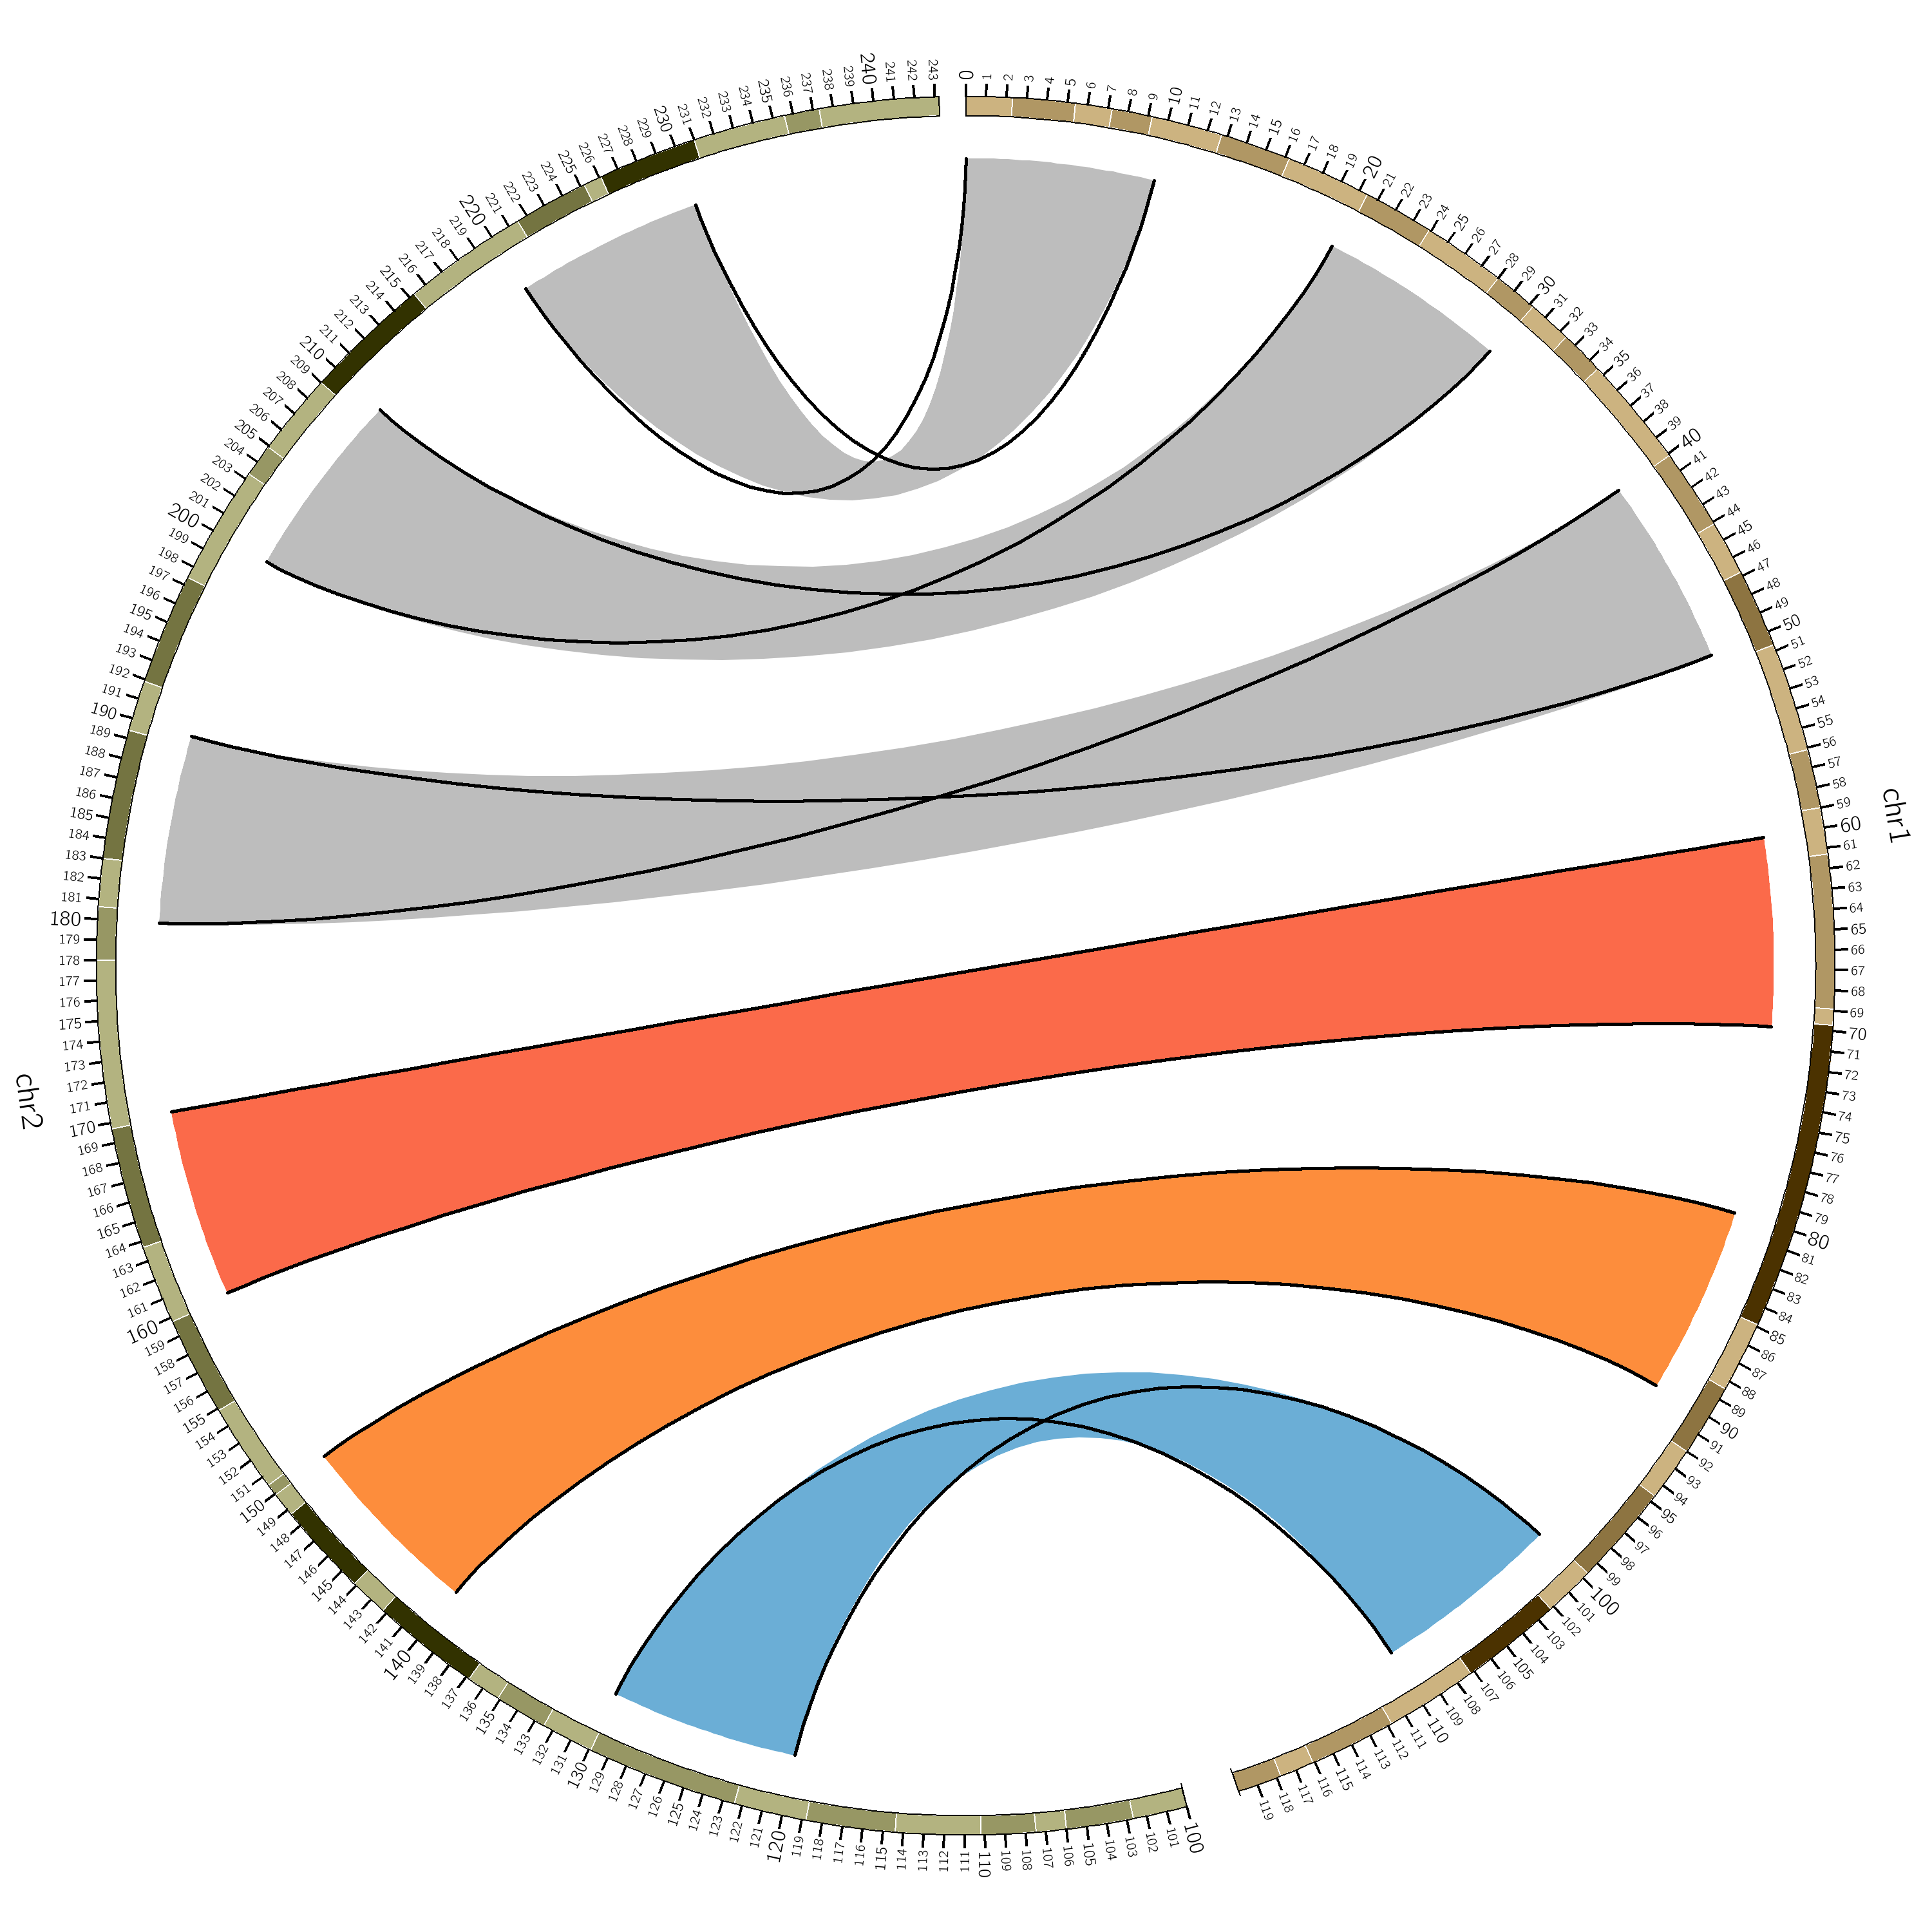

In [3]:
from IPython.display import Image
Image("circos.png")

----

Continue on to the next part of the Recipes series by clicking [here &#10145;](Recipes_Part13.ipynb).

----